# Introduction to Google Colab

In [1]:
from google.colab import drive
drive.mount("/your_path", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /your_path


# Data Collecting / Gathering

In [2]:
# It was tried to be taken in consideration PEP 8 Style Guide 
# for codes to be read easily, shared, and verified!

#!/usr/bin/env python
# -*- coding: utf-8 -*-
__author__ = "Egemen Zeytinci and Oguzhan Yediel"
__email__ = "egemenzeytinci@gmail.com, oguzhan.yediel@gmail.com"
__version__ = "1.0.0"
__status__ = "Production"

# calling the related packages
from keras.callbacks import TensorBoard
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import np_utils

from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 700)

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
raw_data = pd.read_csv("/your_path/My Drive/ING Datathon" 
                       + '/datathon/INGDatathonData/INGDatathonData2018.csv', 
                       sep=';')
raw_data.columns = [column.lower() for column in raw_data.columns.tolist()]
raw_data.head()

,primary_key,default_flag,avg_factoring_fx_rsk12,avg_factoring_fx_rsk3,avg_factoring_fx_rsk6,avg_factoring_rsk12,avg_factoring_rsk3,avg_factoring_rsk6,avg_factoring_tl_rsk12,avg_factoring_tl_rsk3,...,ttl_fx_ind_lmt_utztn_dnm_frk6,ttl_fx_ind_lmt_utzton_dnm_frk3,ttl_fx_or_fx_indxd_noncashlmt,ttl_fx_or_fx_indxd_noncashrsk,ttl_fx_or_fx_indxd_rsk_gr12,ttl_fx_or_fx_indxd_rsk_gr6,ttl_indm_fx_or_fx_noncash_loan,ttl_redcnt_int_amt_gr12,ttl_redcnt_int_amt_gr6,ttl_tl_lmt_utlztn_dnm_frk12
0,1,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,16200.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5.0
1,4,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,7.395522,1.002670,10.0
2,5,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.461333,0.176171,1.0
3,10,0,8192.916667,4354.666667,9041.666667,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,-1.0,0.0,0.000000,-0.110553,0.0
4,11,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,10.0


# Data Exploration

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37224 entries, 0 to 37223
Columns: 682 entries, primary_key to ttl_tl_lmt_utlztn_dnm_frk12
dtypes: float64(680), int64(2)
memory usage: 193.7 MB


In [5]:
# null control
null_control = pd.DataFrame(raw_data.isnull().sum(), 
                            columns=['null_count']).reset_index()
null_control.columns = ['attribute', 'null_count']
null_control['total_row_count'] = len(raw_data)
null_control.head()

,attribute,null_count,total_row_count
0,primary_key,0,37224
1,default_flag,0,37224
2,avg_factoring_fx_rsk12,15631,37224
3,avg_factoring_fx_rsk3,8564,37224
4,avg_factoring_fx_rsk6,9947,37224


In [6]:
# count of the target variable 
raw_data[['default_flag', 'primary_key']].groupby(['default_flag']).count()

,primary_key
default_flag,
0,35489
1,1735


In [7]:
raw_data.dtypes

primary_key                         int64
default_flag                        int64
avg_factoring_fx_rsk12            float64
avg_factoring_fx_rsk3             float64
avg_factoring_fx_rsk6             float64
avg_factoring_rsk12               float64
avg_factoring_rsk3                float64
avg_factoring_rsk6                float64
avg_factoring_tl_rsk12            float64
avg_factoring_tl_rsk3             float64
avg_factoring_tl_rsk6             float64
avg_ttl_accrd_int_amt12           float64
avg_ttl_accrd_int_amt3            float64
avg_ttl_accrd_int_amt6            float64
avg_ttl_cash_rsk12                float64
avg_ttl_cash_rsk3                 float64
avg_ttl_cash_rsk6                 float64
avg_ttl_csh_limit12               float64
avg_ttl_csh_limit3                float64
avg_ttl_csh_limit6                float64
avg_ttl_fx_cash_rsk12             float64
avg_ttl_fx_cash_rsk3              float64
avg_ttl_fx_cash_rsk6              float64
avg_ttl_fx_csh_limit12            

# Data Preparation & Preprocessing

In [8]:
categorical_col_list = []
numerical_col_list = []

for i in [col for col in raw_data.columns.tolist() 
          if col not in ['primary_key', 'default_flag']]:
    if raw_data[i].dtype == 'object':
        categorical_col_list.append(i)
    else:
        numerical_col_list.append(i)
        
print 'Number of categorical features:', str(len(categorical_col_list))
print 'Number of numerical features  :', str(len(numerical_col_list))

Number of categorical features: 0
Number of numerical features  : 680


In [9]:
preprocess_data = raw_data

preprocess_data[numerical_col_list] = preprocess_data[numerical_col_list] \
    .fillna(preprocess_data.groupby('default_flag')[numerical_col_list] \
            .transform('mean'))

preprocess_data.head()

,primary_key,default_flag,avg_factoring_fx_rsk12,avg_factoring_fx_rsk3,avg_factoring_fx_rsk6,avg_factoring_rsk12,avg_factoring_rsk3,avg_factoring_rsk6,avg_factoring_tl_rsk12,avg_factoring_tl_rsk3,...,ttl_fx_ind_lmt_utztn_dnm_frk6,ttl_fx_ind_lmt_utzton_dnm_frk3,ttl_fx_or_fx_indxd_noncashlmt,ttl_fx_or_fx_indxd_noncashrsk,ttl_fx_or_fx_indxd_rsk_gr12,ttl_fx_or_fx_indxd_rsk_gr6,ttl_indm_fx_or_fx_noncash_loan,ttl_redcnt_int_amt_gr12,ttl_redcnt_int_amt_gr6,ttl_tl_lmt_utlztn_dnm_frk12
0,1,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,16200.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5.0
1,4,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.522207,0.199219,0.0,0.0,0.0,0.0,0.0,7.395522,1.002670,10.0
2,5,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.522207,0.199219,0.0,0.0,0.0,0.0,0.0,1.461333,0.176171,1.0
3,10,0,8192.916667,4354.666667,9041.666667,0.0,0.0,0.0,0.0,0.0,...,2.000000,2.000000,0.0,0.0,0.0,-1.0,0.0,0.000000,-0.110553,0.0
4,11,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.522207,0.199219,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,10.0


In [0]:
selected_data = preprocess_data.copy()

# normalization
scaler = MinMaxScaler()
preprocess_data[numerical_col_list] = scaler.fit_transform(
    preprocess_data[numerical_col_list].values)

In [0]:
def correlation(dataset, threshold):
    # Set of all the names of deleted columns
    col_corr = set()
    
    num_cols = [col for col in dataset.columns if col not in ['primary_key', 
                                                              'default_flag']]
    corr_matrix = dataset[num_cols].corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                
                # getting the name of column
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    
                    # deleting the column from the dataset
                    del dataset[colname] 
    return dataset

In [0]:
preprocess_data = correlation(preprocess_data, 0.8)

numerical_col_list = [col for col in preprocess_data 
                      if col in numerical_col_list]

In [0]:
X = preprocess_data[numerical_col_list].values
y = preprocess_data['default_flag'].values

In [14]:
rf = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=0)
rf_trans = SelectFromModel(rf)

rf_X = rf_trans.fit_transform(X, y)

print('We started with {0} features but retained only {1} of them!'
      .format(X.shape[1] - 1, rf_X.shape[1]))
rf_columns = preprocess_data.iloc[:, 2:].columns[rf_trans.get_support()].values

We started with 129 features but retained only 23 of them!


In [15]:
final_column_list = preprocess_data.iloc[:, :2].columns.tolist() + \
preprocess_data[rf_columns].columns.tolist()
preprocessed_data = preprocess_data[final_column_list]
preprocessed_data.head()

,primary_key,default_flag,avg_factoring_rsk12,avg_fx_or_fx_non_util12,cash_limit_fx_util_gr12,cash_limit_fx_util_gr6,fx_or_fx_non_util_gr12,fx_or_fx_non_util_gr6,fx_or_fx_non_utztn_dnm_frk6,fx_or_fx_non_utzton_dnm_frk3,...,stddev_ttl_fx_csh_limit12,dt_max_fx_or_fx_non_util3,dt_max_fx_or_fx_non_util6,factoring_rsk_gr12,stddev_cash_limit_fx_util12,stddev_ttl_fx_non_cash_rsk12,stddev_ttl_fx_non_csh_limit12,total_fx_cash_rsk_gr12,total_fx_non_cash_rsk_gr6,total_non_csh_limit_gr12
0,1,0,0.0,0.000000,0.471259,0.488699,0.516839,0.609378,0.000000,0.000000,...,0.006673,0.507463,0.514706,0.047763,0.069997,0.059767,0.000000,0.001272,0.26225,0.000019
1,4,0,0.0,0.045415,0.471259,0.488699,0.515150,0.607746,0.069451,0.052747,...,0.006673,0.595935,0.565300,0.047763,0.069997,0.059767,0.010285,0.001272,0.26225,0.000022
2,5,0,0.0,0.045415,0.471259,0.488699,0.515150,0.607746,0.069451,0.052747,...,0.006673,0.595935,0.565300,0.047763,0.069997,0.059767,0.010285,0.001272,0.26225,0.000019
3,10,0,0.0,0.045415,0.471259,0.488699,0.515150,0.607746,0.069451,0.052747,...,0.006673,0.595935,0.565300,0.047763,0.069997,0.059767,0.010285,0.001272,0.26225,0.000020
4,11,0,0.0,0.045415,0.471259,0.488699,0.515150,0.607746,0.069451,0.052747,...,0.006673,0.595935,0.565300,0.047763,0.069997,0.059767,0.010285,0.001272,0.26225,0.000015


# Data Splitting

In [16]:
# Train-Test Split
X = preprocessed_data[rf_columns]
y = preprocessed_data['default_flag']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    stratify=y,
                                                    random_state=0)
print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

('Shape of x_train: ', (24940, 23))
('Shape of y_train: ', (24940,))
('Shape of x_test: ', (12284, 23))
('Shape of y_test: ', (12284,))


# Data Modelling & Statistical Analysis

In [0]:
def encode_neural_net_y(y):
    encoder = LabelEncoder()
    encoder.fit(y)
    encoded_y = encoder.transform(y)
    new_y = np_utils.to_categorical(encoded_y)
    return new_y

# neural network model
en_y_train = encode_neural_net_y(y_train)
en_y_test = encode_neural_net_y(y_test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

# create model
model = Sequential()

model.add(Dense(100, 
                input_dim=len(X_train.columns), 
                activation='relu', 
                name='dense_1',
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dropout(0.25))

model.add(Dense(100, 
                activation='relu', 
                name='dense_2', 
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dropout(0.25))

model.add(Dense(2, 
                activation='softmax', 
                name='dense_3'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               2400      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 12,702
Trainable params: 12,702
Non-trainable params: 0
_________________________________________________________________


In [0]:
tensorboard = TensorBoard(log_dir='./logs', 
                          histogram_freq=0, 
                          write_graph=True, 
                          write_images=False)

In [0]:
history = model.fit(np.array(X_train), 
                    np.array(en_y_train), 
                    epochs=200, 
                    batch_size=500, 
                    verbose=0, 
                    validation_split=0.33,
                    callbacks=[tensorboard])

In [0]:
model.save_weights('weights.h5', overwrite=True)

In [23]:
scores = model.evaluate(np.array(X_test), np.array(en_y_test), verbose=0)
print("====================[TEST SCORE]====================")
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

====================[TEST SCORE]====================
acc: 98.53%


# Model Evaluation & Conclusion

In [24]:
preds = model.predict(np.array(X_test))
preds_class = model.predict_classes(np.array(X_test))

X_copy = X_test.copy()

y_class = pd.DataFrame(y_test).idxmax(axis=1)

X_copy['original'] = y_class.tolist()
X_copy['predict'] = preds_class
X_copy.head(5)

,avg_factoring_rsk12,avg_fx_or_fx_non_util12,cash_limit_fx_util_gr12,cash_limit_fx_util_gr6,fx_or_fx_non_util_gr12,fx_or_fx_non_util_gr6,fx_or_fx_non_utztn_dnm_frk6,fx_or_fx_non_utzton_dnm_frk3,fx_or_fx_non_utzttn_dnm_frk12,stddev_factoring_fx_rsk12,...,dt_max_fx_or_fx_non_util6,factoring_rsk_gr12,stddev_cash_limit_fx_util12,stddev_ttl_fx_non_cash_rsk12,stddev_ttl_fx_non_csh_limit12,total_fx_cash_rsk_gr12,total_fx_non_cash_rsk_gr6,total_non_csh_limit_gr12,original,predict
5199,0.000000,0.045415,0.471259,0.488699,0.515150,0.607746,0.069451,0.052747,0.130736,0.005286,...,0.565300,0.047763,0.069997,0.059767,0.010285,0.001272,0.26225,0.000021,default_flag,0
36085,0.000655,0.045415,0.471259,0.488699,0.515150,0.607746,0.069451,0.052747,0.130736,0.005286,...,0.565300,0.047768,0.069997,0.059767,0.010285,0.001222,0.26210,0.000238,default_flag,0
4682,0.000000,0.000000,0.475380,0.490032,0.516839,0.609378,0.000000,0.000000,0.000000,0.003445,...,0.490196,0.047763,0.078956,0.001780,0.000000,0.001272,0.26225,0.000020,default_flag,0
9732,0.000000,0.045415,0.471259,0.488699,0.515150,0.607746,0.069451,0.052747,0.130736,0.005286,...,0.565300,0.047763,0.069997,0.059767,0.010285,0.001272,0.26225,0.000016,default_flag,0
7799,0.000000,0.045415,0.471259,0.488699,0.515150,0.607746,0.069451,0.052747,0.130736,0.005286,...,0.565300,0.047763,0.069997,0.059767,0.010285,0.001272,0.26225,0.000020,default_flag,0


In [25]:
X_copy[(X_copy['original'] == 1) & (X_copy['predict'] != 1)]

,avg_factoring_rsk12,avg_fx_or_fx_non_util12,cash_limit_fx_util_gr12,cash_limit_fx_util_gr6,fx_or_fx_non_util_gr12,fx_or_fx_non_util_gr6,fx_or_fx_non_utztn_dnm_frk6,fx_or_fx_non_utzton_dnm_frk3,fx_or_fx_non_utzttn_dnm_frk12,stddev_factoring_fx_rsk12,...,dt_max_fx_or_fx_non_util6,factoring_rsk_gr12,stddev_cash_limit_fx_util12,stddev_ttl_fx_non_cash_rsk12,stddev_ttl_fx_non_csh_limit12,total_fx_cash_rsk_gr12,total_fx_non_cash_rsk_gr6,total_non_csh_limit_gr12,original,predict


In [26]:
# Results of Prediction
pd.concat([preprocessed_data.iloc[:, :1], X_copy], axis=1).dropna().head()

,primary_key,avg_factoring_rsk12,avg_fx_or_fx_non_util12,cash_limit_fx_util_gr12,cash_limit_fx_util_gr6,fx_or_fx_non_util_gr12,fx_or_fx_non_util_gr6,fx_or_fx_non_utztn_dnm_frk6,fx_or_fx_non_utzton_dnm_frk3,fx_or_fx_non_utzttn_dnm_frk12,...,dt_max_fx_or_fx_non_util6,factoring_rsk_gr12,stddev_cash_limit_fx_util12,stddev_ttl_fx_non_cash_rsk12,stddev_ttl_fx_non_csh_limit12,total_fx_cash_rsk_gr12,total_fx_non_cash_rsk_gr6,total_non_csh_limit_gr12,original,predict
10,19,0.0,0.045415,0.471259,0.488699,0.51515,0.607746,0.069451,0.052747,0.130736,...,0.5653,0.047763,0.069997,0.059767,0.010285,0.001272,0.26225,0.000022,default_flag,0.0
11,21,0.0,0.045415,0.471259,0.488699,0.51515,0.607746,0.069451,0.052747,0.130736,...,0.5653,0.047763,0.069997,0.059767,0.010285,0.001272,0.26225,0.000020,default_flag,0.0
13,23,0.0,0.045415,0.471259,0.488699,0.51515,0.607746,0.069451,0.052747,0.130736,...,0.5653,0.047763,0.069997,0.059767,0.010285,0.001272,0.26225,0.000022,default_flag,0.0
19,32,0.0,0.045415,0.471259,0.488699,0.51515,0.607746,0.069451,0.052747,0.130736,...,0.5653,0.047763,0.069997,0.059767,0.010285,0.001272,0.26225,0.000020,default_flag,0.0
21,35,0.0,0.045415,0.471259,0.488699,0.51515,0.607746,0.069451,0.052747,0.130736,...,0.5653,0.047763,0.069997,0.059767,0.010285,0.001272,0.26225,0.000020,default_flag,0.0


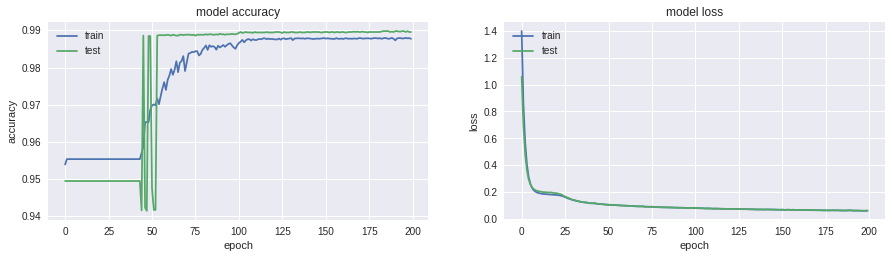

In [27]:
# summarize history for accuracy
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

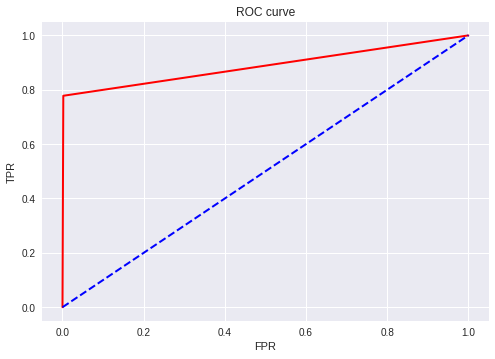

In [28]:
y_pred_keras = model.predict_classes(X_test)

##Computing false and true positive rates
fpr, tpr, _ = roc_curve(preds_class, y_test)

plt.figure()

##Adding the ROC
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [29]:
roc_auc_score(y_pred_keras, y_test)

0.8879741192939862

In [0]:
# create model
model = Sequential()

model.add(Dense(100, 
                input_dim=len(X_train.columns), 
                activation='relu', 
                name='dense_1'))
model.add(Dropout(0.25))

model.add(Dense(100, 
                activation='relu', 
                name='dense_2'))
model.add(Dropout(0.25))

model.add(Dense(100, 
                activation='relu', 
                name='new_dense'))

# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.load_weights('weights.h5', by_name=True)

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               2400      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
new_dense (Dense)            (None, 100)               10100     
Total params: 22,600
Trainable params: 22,600
Non-trainable params: 0
_________________________________________________________________


In [0]:
preds = model.predict(np.array(preprocessed_data[rf_columns]))

In [0]:
def normalize_labels(labels):
    labels_np = np.array(labels)
    return labels_np / labels_np.sum()

def calculate(score_dist):
    score_dist = normalize_labels(score_dist)
    return (score_dist * np.arange(1, 101)).sum()

In [0]:
scores = list()

for i in range(len(preds)):
    scores.append(calculate(preds[i]))  

In [0]:
preprocessed_data['score'] = scores
preprocessed_data['score'] = preprocessed_data['score'].fillna(0)

In [0]:
min_value = preprocessed_data['score'].min()
max_value = preprocessed_data['score'].max()

step = 550 / (max_value - min_value)
preprocessed_data['score'] = 600 - ((preprocessed_data['score'] - min_value) 
                                    * step)

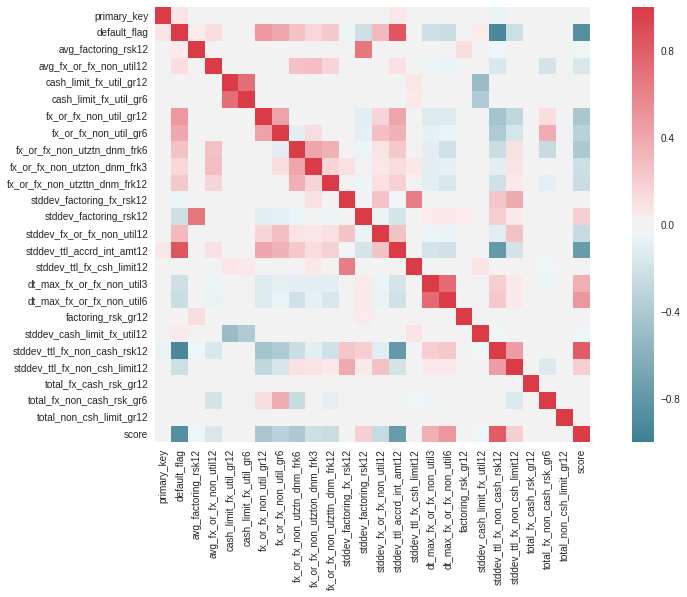

In [37]:
f, ax = plt.subplots(figsize=(15, 8))
corr = preprocessed_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [0]:
# calculate information value
def calc_iv(df, feature, target, sc=False):
    lst = []

    df[feature] = df[feature].fillna('NULL')

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['variable', 'value', 'all', 'good', 'bad'])
    
    data['share'] = data['all'] / data['all'].sum()
    data['bad_rate'] = data['bad'] / data['all']
    data['distribution_good'] = (data['all'] - data['bad']) / (data['all'].sum() - data['bad'].sum())
    data['distribution_bad'] = data['bad'] / data['bad'].sum()
    data['woe'] = np.log(data['distribution_good'] / data['distribution_bad'])

    data = data.replace({'woe': {np.inf: 0, -np.inf: 0}})

    data['iv'] = data['woe'] * (data['distribution_good'] - 
                                data['distribution_bad'])
    
    if sc:
        return data[['value', 'woe']].rename(columns={'woe': 'WOE_{}'.format(col), 
                                                      'value': feature})
    
    return data['iv'].sum()

In [0]:
# features = dict()
# all_features = numerical_col_list
# all_features.extend(['default_flag', 'primary_key'])

# woe_data = raw_data[all_features]

# for col in woe_data.columns.difference(['default_flag', 'primary_key']):
#   val = calc_iv(woe_data, col, 'default_flag')
#   features[col] = val

In [0]:
# np.save('/your_path/My Drive/ING Datathon/features.npy', features)

In [0]:
features = np.load('/your_path/My Drive/ING Datathon/features.npy').item()
high = [k for k,v in features.iteritems() if v >= 0.2]
high.extend(['default_flag', 'primary_key'])

iv_df = selected_data[high]

In [0]:
X = iv_df[[x for x in high if x not in ['default_flag', 'primary_key']]].values
y = iv_df['default_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=0)

In [0]:
fold = KFold(len(y_train), n_folds=5, random_state=0)

logistic_cv = LogisticRegressionCV(random_state=0, cv=fold)
logistic_cv.fit(X_train, y_train)
train_score = logistic_cv.score(X_train, y_train)

In [44]:
print 'Train score: {0}'.format(train_score)

Train score: 0.953327987169


In [45]:
logistic_cv.fit(X, y)
logistic_cv.coef_

array([[ 5.72989938e-05,  5.61337702e-01, -4.71357939e-05,
         7.92867575e-01,  1.58232861e-01,  7.81392708e-04,
        -4.53453048e-05]])

In [46]:
factor = 28.85
offset = 487.14
logistic_cv.intercept_[0]

-4.3210984509901875

In [47]:
for i, col in zip(range(0, 7), iv_df.columns.difference(['default_flag', 'PRIMARY_KEY'])):
    iv_df['binned'] = pd.qcut(iv_df[col], 20, labels=False, duplicates='drop')
    df = calc_iv(iv_df, 'binned', 'default_flag', sc=True)
    
    coef = logistic_cv.coef_[0][i]
    n = len(df)
    a = logistic_cv.intercept_[0]
    
    df['SCORE_{}'.format(col)] = ((coef * df['WOE_{}'.format(col)] + a / n) 
                                  * factor + offset / n)
    df = df[['SCORE_{}'.format(col), 'binned']]
    
    if i == 0:
        merged = df.merge(iv_df, on='binned', how='inner')[['SCORE_{}'.format(col), 'primary_key', 'default_flag']]
    else:
        second = df.merge(iv_df, on='binned', how='inner')[['SCORE_{}'.format(col), 'primary_key', 'default_flag']]
        merged = second.merge(merged, on=['primary_key', 'default_flag'], how='inner')

    del iv_df['binned']
    del df['binned']
    
merged.head()

,SCORE_std_number_of_bank_12,primary_key,default_flag,SCORE_primary_key,SCORE_number_of_bank_gr12,SCORE_avg_ttl_redcnt_int_amt12,SCORE_avg_ttl_accrd_int_amt3,SCORE_avg_ttl_accrd_int_amt12,SCORE_avg_number_of_bank12
0,40.274249,1,0,18.156623,43.197433,50.133406,60.412156,54.212754,27.883697
1,40.274249,4,0,18.156623,43.197433,19.472268,60.412156,54.212754,27.882942
2,40.274249,5,0,18.156623,43.197433,19.978018,60.412156,39.279023,27.882942
3,40.274249,11,0,18.156623,43.197433,50.133406,60.412156,54.212754,27.883948
4,40.274249,14,0,18.156623,43.197433,27.449989,60.412156,71.321783,27.883697


In [0]:
merged['TOTAL_SCORE'] = 0

for col in merged.columns.tolist():
    if 'SCORE' in col:
        merged['TOTAL_SCORE'] += merged[col]

In [49]:
merged[['primary_key', 'TOTAL_SCORE']].describe()

,primary_key,TOTAL_SCORE
count,37224.000000,37224.000000
mean,31511.526623,549.033880
std,18006.998514,70.117286
min,1.000000,292.448823
25%,16108.500000,517.028126
50%,31455.500000,539.405433
75%,47208.250000,588.541435
max,62646.000000,656.449712


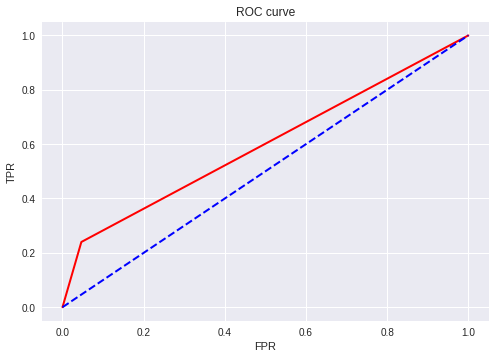

In [50]:
##Computing false and true positive rates
fpr, tpr,_ = roc_curve(logistic_cv.predict(X), 
                       y, 
                       drop_intermediate=False)

plt.figure()

##Adding the ROC
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [51]:
roc_auc_score(logistic_cv.predict(X), y)

0.5967601279604291